## 1. Fazendo a importação da planilha excel de dados

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from math import ceil 

df = pd.read_excel('Dados_Bombas_Gasolina.xlsx')
df

,SERIAL,PRECO_LITRO,LITRO,VALOR_FIN
0,9929,7.4238,4.5566,33.83
1,4930,6.1330,4.1158,25.24
2,5042,6.4172,3.5672,22.89
3,7430,7.1168,3.2924,23.43
4,3971,7.3883,3.7340,55.18
5,7214,6.5346,3.3817,22.10
6,1753,7.2201,2.1730,31.38
7,7034,7.2710,3.2774,23.83
8,2933,6.6090,2.6275,34.73
9,4760,7.0137,2.5905,36.34


### Verificando a existência de dados ausente e os tratando.

In [257]:
df.isnull().sum().sort_values(ascending=False)

VALOR_FIN      5
SERIAL         0
PRECO_LITRO    0
LITRO          0
dtype: int64

In [258]:
df.describe()

,SERIAL,PRECO_LITRO,LITRO,VALOR_FIN
count,30.000000,30.000000,30.000000,25.000000
mean,5562.366667,6.881093,3.517400,36.427200
std,2332.584189,0.430900,0.907123,14.787239
min,1753.000000,6.066200,2.066500,13.770000
25%,3598.250000,6.555525,2.599750,25.240000
50%,5097.500000,6.947100,3.599950,33.830000
75%,7193.500000,7.204275,4.436500,51.180000
max,9929.000000,7.481900,4.897200,65.830000


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SERIAL       30 non-null     int64  
 1   PRECO_LITRO  30 non-null     float64
 2   LITRO        30 non-null     float64
 3   VALOR_FIN    25 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


In [260]:
# Fazendo uma cópia do dataframe 
df1 = df
dfnan = df[df['VALOR_FIN'].isnull()]
dfnan

,SERIAL,PRECO_LITRO,LITRO,VALOR_FIN
22,7950,6.4944,2.5017,NaN
25,6773,6.0932,4.5434,NaN
26,2637,7.1283,3.6096,NaN
28,4561,6.6501,2.9263,NaN
29,2802,6.5377,4.0113,NaN


In [261]:
# Fazendo a remoção dos dados ausentes
df = df.dropna()
df

,SERIAL,PRECO_LITRO,LITRO,VALOR_FIN
0,9929,7.4238,4.5566,33.83
1,4930,6.1330,4.1158,25.24
2,5042,6.4172,3.5672,22.89
3,7430,7.1168,3.2924,23.43
4,3971,7.3883,3.7340,55.18
5,7214,6.5346,3.3817,22.10
6,1753,7.2201,2.1730,31.38
7,7034,7.2710,3.2774,23.83
8,2933,6.6090,2.6275,34.73
9,4760,7.0137,2.5905,36.34


### Definindo nosso dataframe com apenas os dados corretos

In [262]:
# Criando variaveis com limite aceitaveis para valor da gasolina
value_up = round(df['PRECO_LITRO']*df['LITRO'], 2) + 0.02
value_down = round(df['PRECO_LITRO']*df['LITRO'], 2) - 0.02

In [263]:
df_remove = df.loc[(df['VALOR_FIN'] <= value_up) & (df['VALOR_FIN'] >= value_down)]
df_remove

,SERIAL,PRECO_LITRO,LITRO,VALOR_FIN
0,9929,7.4238,4.5566,33.83
1,4930,6.1330,4.1158,25.24
2,5042,6.4172,3.5672,22.89
3,7430,7.1168,3.2924,23.43
5,7214,6.5346,3.3817,22.10
7,7034,7.2710,3.2774,23.83
10,6495,6.9238,4.8972,33.91
12,2804,6.0662,2.2692,13.77
13,7132,6.9704,4.5527,31.73
15,6585,7.4805,4.6240,34.59


In [273]:
# Bombas com defeito:
defect = pd.concat([df,df_remove]).drop_duplicates(keep=False)

# Imprimindo bombas com defeito
for id in defect.index:
    print(f"Bomba com defeito = {defect['SERIAL'][id]}")

print(f"\nQuantidade de bombas defeituosas = {defect.shape[0]}", end='\n\n')

for id in dfnan.index:
    print(f"Bomba sem leitura = {dfnan['SERIAL'][id]}")
print(f"\nQuantidade de bombas sem leituras = {dfnan.shape[0]}")

Bomba com defeito = 3971
Bomba com defeito = 1753
Bomba com defeito = 2933
Bomba com defeito = 4760
Bomba com defeito = 4931
Bomba com defeito = 3474
Bomba com defeito = 6934
Bomba com defeito = 8503
Bomba com defeito = 2117
Bomba com defeito = 9349
Bomba com defeito = 2255
Bomba com defeito = 5153
Bomba com defeito = 8094

Quantidade de bombas defeituosas = 13

Bomba sem leitura = 7950
Bomba sem leitura = 6773
Bomba sem leitura = 2637
Bomba sem leitura = 4561
Bomba sem leitura = 2802

Quantidade de bombas sem leituras = 5


### Axis = 1:

concatenated = pandas.concat([df1, df2], axis=1)

![](https://files.realpython.com/media/concat_col.a8eec2b4e84f.png)

### axisless:

concatenated = pandas.concat([df1, df2])

![](https://files.realpython.com/media/concat_axis0.2ec65b5f72bc.png)

### Criando gráfico de barras com as máquinas com defeito

In [265]:
def repetions(dataframe, dic={}):
    for id in dataframe.index:
        number = str(dataframe['SERIAL'][id])

        dic.setdefault(int(number[0]), 0)
        dic[int(number[0])] = dic[int(number[0])] + 1
    
    return dic

In [266]:
serie = repetions(defect)
serie

{3: 2, 1: 1, 2: 3, 4: 2, 6: 1, 8: 2, 9: 1, 5: 1}

In [267]:
serie = repetions(dfnan, dic=serie)
serie

{3: 2, 1: 1, 2: 5, 4: 3, 6: 2, 8: 2, 9: 1, 5: 1, 7: 1}

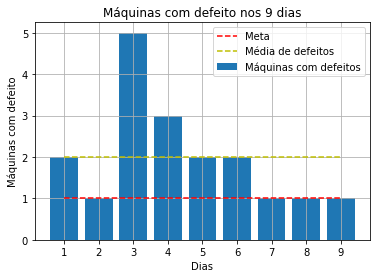

In [280]:
x = sorted(serie.keys())

# Ceil: Round a number upward to its nearest integer:
mean = ceil(mean(serie.values()))

plt.grid(True)
plt.title('Máquinas com defeito nos 9 dias')
plt.plot([1, max(x)], [1, 1], 'r--')  # Meta
plt.plot([1, max(x)], [mean, mean], 'y--')  # Média

plt.bar(x, serie.values(), align='center')
plt.xticks(x)

plt.legend(['Meta', 'Média de defeitos', 'Máquinas com defeitos'])
plt.ylabel('Máquinas com defeito')
plt.xlabel('Dias')

plt.show()

In [282]:
print(sum(serie.values()))

18
